## Confusion Matrix of Wine Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


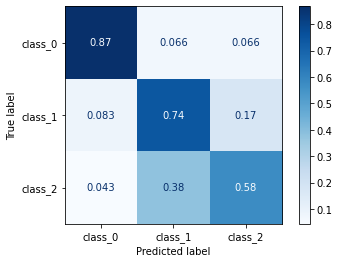

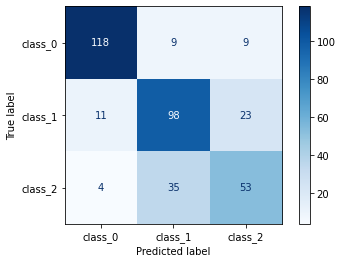

In [2]:
from collections import Counter

wine = load_wine()

max_seed = 10

predict_list = []
label_list = []
error_value = []
error = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            values = x_test[idx]
            values = np.append(values, y_test[idx])
            error_value.append(values)

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)

In [7]:
from scipy.spatial.distance import euclidean
np.set_printoptions(precision=6, suppress=True)

k = 5

for e in error:
    dist_arr = []
    print("Error data value : ", e[:13], " / label : ", int(e[-1]))
    
    for idx, data in enumerate(wine.data):
        data = data.reshape(1, -1)
        dist = euclidean(e[:13], data)
        dist_arr.append(dist)
    
    dist = np.argsort(dist_arr)[:k]
    for s, d in enumerate(dist[1:]):
        print(s+1, "th close distance value : ", f'{wine.data[d]}', " / label : ", wine.target[d])
    print("-----" * 11)

Error data value :  (12.79, 2.67, 2.48, 22.0, 112.0, 1.48, 1.36, 0.24, 1.26, 10.8, 0.48, 1.47, 480.0)  / label :  2
1 th close distance value :  [ 11.56   2.05   3.23  28.5  119.     3.18   5.08   0.47   1.87   6.
   0.93   3.69 465.  ]  / label :  1
2 th close distance value :  [ 11.84   2.89   2.23  18.   112.     1.72   1.32   0.43   0.95   2.65
   0.96   2.52 500.  ]  / label :  1
3 th close distance value :  [ 12.7    3.87   2.4   23.   101.     2.83   2.55   0.43   1.95   2.57
   1.19   3.13 463.  ]  / label :  1
4 th close distance value :  [ 13.5    3.12   2.62  24.   123.     1.4    1.57   0.22   1.25   8.6
   0.59   1.3  500.  ]  / label :  2
-------------------------------------------------------
Error data value :  (13.24, 2.59, 2.87, 21.0, 118.0, 2.8, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735.0)  / label :  0
1 th close distance value :  [ 13.34   0.94   2.36  17.   110.     2.53   1.3    0.55   0.42   3.17
   1.02   1.93 750.  ]  / label :  1
2 th close distance value :  [ 